
### Q6. Using Titanic dataset, to do the following:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ship = pd.read_csv("titanic.csv")
ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### a. Clean the data by dropping the column which has the largest number of missing values.

In [10]:
column_most_missing = ship.isnull().sum().idxmax()
ship.drop(column_most_missing, axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### b. Find total number of passengers with age more than 30

In [11]:
ship[ship['Age'] > 30].count()

PassengerId    305
Survived       305
Pclass         305
Name           305
Sex            305
Age            305
SibSp          305
Parch          305
Ticket         305
Fare           305
Cabin          116
Embarked       303
dtype: int64

### c. Find total fare paid by passengers of second class

In [12]:
ship[ship['Pclass'] == 2]['Fare'].sum()

3801.8417

### d. Compare number of survivors of each passenger class

In [13]:
ship.groupby("Pclass")["Survived"].agg([("Survivors","sum")])

,Survivors
Pclass,
1,136
2,87
3,119


### e. Compute descriptive statistics for age attribute gender wise

In [14]:
ship.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


### f. Draw a scatter plot for passenger fare paid by Female and Male passengers separately

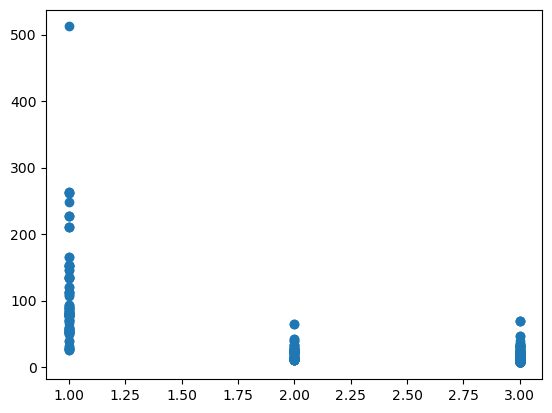

In [15]:
plt.scatter(ship[ship["Sex"]=="female"]["Pclass"],ship[ship["Sex"]=="female"]["Fare"])
plt.show()

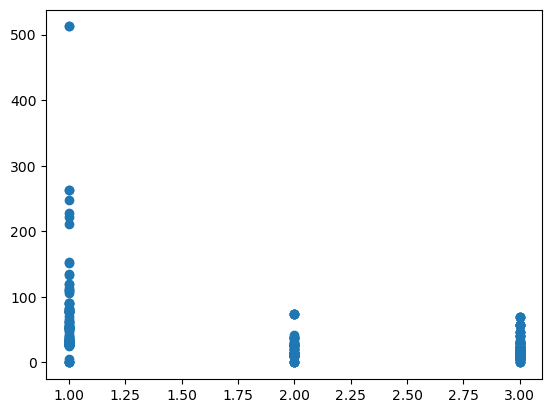

In [16]:
plt.scatter(ship[ship["Sex"]=="male"]["Pclass"],ship[ship["Sex"]=="male"]["Fare"])
plt.show()

### g. Compare density distribution for features age and passenger fare

### h. Draw the pie chart for three groups labelled as class 1, class 2, class 3 respectively displayed in different  colours. The occurrence of each group converted into percentage should be displayed in the pie chart.  Appropriately Label the chart.

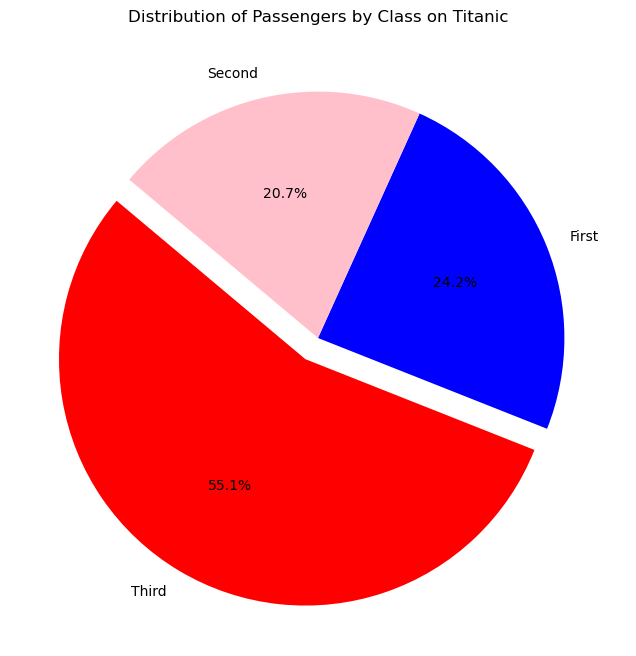

In [20]:
# Count the number of passengers in each class
class_counts = titanic['class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'pink']
explode = (0.1, 0, 0)  # explode the 1st slice (i.e., 'class 1')

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode)

plt.title('Distribution of Passengers by Class on Titanic')
plt.show()


### i. Find % of survived passengers for each class and answer the question “Did class play a role in survival?”.


In [17]:
ship.groupby("Pclass")["Survived"].agg([("% survived",lambda x:x.mean()*100)])

,% survived
Pclass,
1,62.962963
2,47.282609
3,24.236253
